In [1]:
%matplotlib inline

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Para manter consistência dos resultados

In [4]:
np.random.seed(777)

In [5]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential

Using TensorFlow backend.


### Imagem original do gato

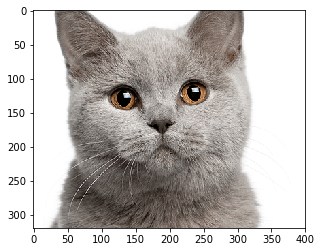

In [6]:
cat = mpimg.imread('cat.png')
plt.imshow(cat)

### Nota-se que a imagem acima tem 320 pixels no sentido vertical, da altura, 400 pixels no sentido horizontal, da largura e 4 canais, sendo os canais correspondentes aos tons de RGB e um quarto canal para o alpha da imagem

In [7]:
print(cat.shape)

(320, 400, 4)


## O código abaixo cria um novo modelo da rede, adicionando uma camada convolucional que treina 3 características das amostras de entrada, usando filtros de dimensão 3x3 e passo igual a 1.

## Isto significa que a camada irá:
### 1. Inicializar 3 filtros convolucionais, com dimensão de 3 unidades de altura por 3 unidades de largura, em que cada célula é preenchida com um valor aleatório.
### 2. Criar 3 mapas de características da imagem do gato.
### 3. Irá varrer a imagem do gato percorrendo cortes de tamanho 3 pixels de altura por 3 pixels de largura.
### 4. Irá se deslocar no sentido horizontal movendo de pixel em pixel, e assim que chegar ao final da linha, irá se deslocar somente uma posição também, tendo como novo topo a linha seguinte à do topo anterior.
### 5. Cada filtro irá fazer uma convolução entre os seus valores e os valores do corte percorrido, multiplicando os valores correspondentes de cada posição das duas matrizes e somando o valores obtidos. O somatório correspondente é armazenado no mapa de características associado ao filtro da convolução.
### 6. A convolução é realizada uma vez para cada canal da imagem, de forma que ao final da convolução de cada canal os valores do mapa de características daquele filtro vão sendo acumulados, resultando em 3 mapas finais, um para cada filtro.
### 7. Ao final do treinamento de um modelo de rede convolucional, os valores dos filtros são ajustados, de acordo com uma função de custo escolhida, visando preencher os mapas de características com valores que melhor permitam o reconhecimento dos dados de entrada, que, no caso, é a imagem do gato.

In [8]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))

## O código abaixo ajusta a dimensão do vetor de entrada, correspondente à imagem do gato. O valor 1 indica a quantidade de amostras. Neste cenário, o valor é 1 por ter uma única amostra, que é a imagem do gato.

In [9]:
cat_batch = np.expand_dims(cat,axis=0)
print(cat_batch.shape)

(1, 320, 400, 4)


## O código abaixo faz uma tentativa de reconstrução da imagem do gato a partir do modelo criado anteriormente

In [10]:
conv_cat = model.predict(cat_batch)

## O método abaixo agrupa as últimas linhas acima:
### 1. ajustando a dimensão da imagem do gato para contemplar o tamanho das amostras
### 2. fazer uma predição em cima deste novo vetor redimensionado 
### 3. retornar a única amostra para a dimensão original para exibi-la 
### 4. visualizar a imagem estimada pelo modelo

In [11]:
def visualize_cat(model, cat):
    print("Dimensão original do gato", cat.shape)
    cat_batch = np.expand_dims(cat,axis=0)
    print("Dimensão expandida para contemplar quantidade de amostras", cat_batch.shape)
    conv_cat = model.predict(cat_batch)
    print("Dimensão da predição do modelo", conv_cat.shape)
    conv_cat = np.squeeze(conv_cat, axis=0)
    print("Dimensão removendo a quantidade de amostras", conv_cat.shape)
    plt.imshow(conv_cat)

## A linha abaixa invoca o método criado anteriormente, para analisar como o modelo estima a imagem do gato. Note que houve uma perda das informações originais, correspondente ao tamanho dos mapas de características, que reduziram a dimensão da imagem em duas unidades em cada sentido, bem como a perda de um canal de dados, por ter usado somente um mapa a menos de características em relação ao número de canais.

### A dimensão da saída pode ser calculada utilizando a dimensão da entrada, a dimensão dos filtros e o tamanho do passo, pela fórmula (dimensão_entrada - dimensão_filtro)/tamanho_passo + 1:

### Para a altura:  320 - 3 / 1 + 1 = 318
### Para a largura: 400 - 3 / 1 + 1 = 398

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 318, 398, 3)
Dimensão removendo a quantidade de amostras (318, 398, 3)


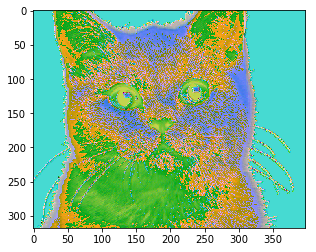

In [12]:
visualize_cat(model, cat)

## O código abaixo cria um novo modelo de convolução, mas desta vez usando filtros de dimensões 10x10, ou seja, varrendo um corte maior da imagem e extraindo menos características

In [13]:
model = Sequential()
model.add(Convolution2D(3, (10,10), input_shape=cat.shape))

## Note que a visualização do gato com este novo modelo promove uma perda maior ainda de informações, por usar um filtro de tamanho maior, mantendo a mesma quantidade do filtro. Desta vez, a imagem resultante fica mais distante ainda em relação à original.

## Com este novo modelo, usando a fórmula acima, a dimensão da entrada cai de 400 x 320 para 391 x 311, diferente do modelo anterior, que gerava 398x318.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 311, 391, 3)
Dimensão removendo a quantidade de amostras (311, 391, 3)


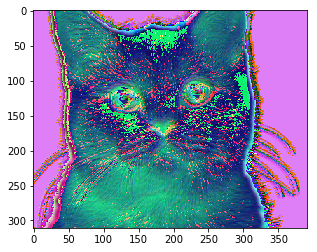

In [14]:
visualize_cat(model, cat)

## O código abaixo cria uma versão do mesmo método criado anteriormente, mas que faz um processamento adicional, removendo a dimensão da imagem correspondente aos canais, usando somente um canal para a exibição da imagem estimada pelo modelo.

In [15]:
def imprime_gatinho_fofo(model, cat):
    print("Dimensão original do gato", cat.shape)
    cat_batch = np.expand_dims(cat,axis=0)
    print("Dimensão expandida para contemplar quantidade de amostras", cat_batch.shape)
    conv_cat2 = model.predict(cat_batch)
    print("Dimensão da predição do modelo", conv_cat2.shape)
    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    print("Dimensão removendo a quantidade de amostras", conv_cat2.shape)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])
    print("Dimensão removendo a quantidade de canais", conv_cat2.shape)
    plt.imshow(conv_cat2)

## O código abaixo cria um novo modelo, mas com somente um mapa de características, voltando a usar um nível de detalhe com filtros 3x3.

In [16]:
model = Sequential()
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))

## Conforme pode-se ver pela imagem gerada, ela foi estimada com somente um canal e somente um mapa de características, mantendo neste mapa os valores correspondentes ao canal de uma única cor, verde (dentre os canais de vermelho, verde ou azul)

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 318, 398, 1)
Dimensão removendo a quantidade de amostras (318, 398, 1)
Dimensão removendo a quantidade de canais (318, 398)


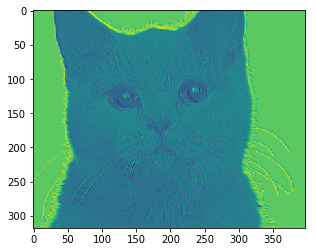

In [17]:
imprime_gatinho_fofo(model, cat)

## O código abaixo cria um novo modelo, voltando a usar um único mapa de características, com dimensões reduzidas, a partir do uso de filtros maiores, 15x15.

In [18]:
model = Sequential()
model.add(Convolution2D(1, (15,15), input_shape=cat.shape))

## Desta vez a imagem gerada do gato a partir do modelo tem bem menos detalhes, devido ao aumento da dimensão dos filtros, e de uma maior perda de informações no mapa de características resultantes: de 400x320 para 386x306, em um único canal verde.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 306, 386, 1)
Dimensão removendo a quantidade de amostras (306, 386, 1)
Dimensão removendo a quantidade de canais (306, 386)


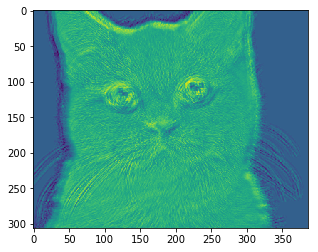

In [19]:
imprime_gatinho_fofo(model, cat)

## O código abaixo cria um modelo semelhante aos criados anteriormente, com um único mapa, e filtros 3x3, mas, desta vez, adicionando uma camada ReLU, para dar uma maior ênfase às características extraídas da imagem do gato.

In [20]:
model = Sequential()
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))

## Note que na impressão da imagem do gato, usando o modelo com ReLU, a imagem ficou mais nítida, pois foram desprezadas as informações que não condizeram com as características extraídas pelo modelo.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 318, 398, 1)
Dimensão removendo a quantidade de amostras (318, 398, 1)
Dimensão removendo a quantidade de canais (318, 398)


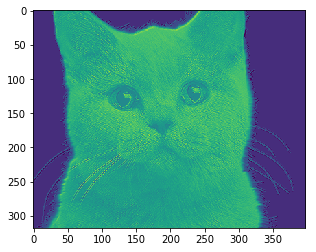

In [21]:
imprime_gatinho_fofo(model, cat)

## O código abaixo cria um novo modelo com uma camada ReLU, mas, desta vez, com 3 mapas de características, voltando a extrair mais características do que no modelo anterior.

In [22]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))

## Note que na visualização da imagem do gato, com este novo modelo, e sem retirar a dimensão dos canais da imagem, pode-se perceber que o modelo estima uma imagem mais complexa, com maior quantidade de características extraídas e somente um canal a menos do que a imagem original.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 318, 398, 3)
Dimensão removendo a quantidade de amostras (318, 398, 3)


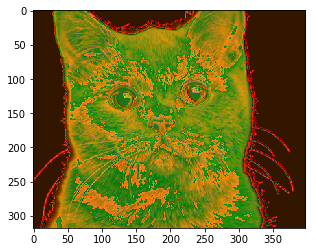

In [23]:
visualize_cat(model, cat)

## O código abaixo cria um novo modelo, com um único mapa de características e filtros 3x3, deixando de usar uma camada ReLU e adicionando uma camada de pooling de dimensões 5x5.

## O efeito que a camada de pooling promove é uma redução da dimensão dos dados, dando mais ênfase às características extraídas pro mapa, descartando as que não são tão intensas.

## O pooling funciona varrendo o mapa de características em um corte de dimensão 5x5 e passo 5. Por usar uma função max, extrai de cada corte o valor máximo encontrado no mesmo, guardando em um novo mapa reduzido, semelhante ao que é feito na convolução.

In [24]:
model = Sequential()
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(5,5)))

## Visualizando a imagem do gato abaixo, com somente um canal de cores, pode-se ver que foi feita uma redução da dimensão de 400x320 para 79x63, e que foram mantidas as características principais de um gato, perdendo informações mais sutis e mais particulares, que definiam mais o gato da amostra.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 63, 79, 1)
Dimensão removendo a quantidade de amostras (63, 79, 1)
Dimensão removendo a quantidade de canais (63, 79)


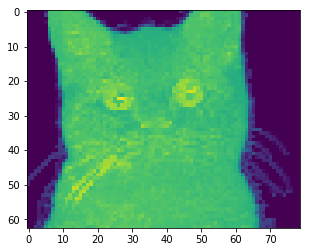

In [25]:
imprime_gatinho_fofo(model, cat)

## O código abaixo cria um novo modelo com maxpooling de 5x5, mas com 3 mapas de características e filtros 3x3, ao invés do único mapa do modelo anterior.

In [26]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(5,5)))

## Visualizando a imagem do gato utilizando o modelo acima, sem eliminar todas as dimensões de canal da imagem, pode-se ver que ficaram mais destacadas algumas características do gato, como suas orelhas, olhos, nariz, bigodes, em relação ao modelo anterior.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 63, 79, 3)
Dimensão removendo a quantidade de amostras (63, 79, 3)


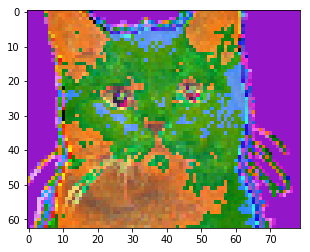

In [27]:
visualize_cat(model, cat)

## O código abaixo cria novo modelo agrupando todos os recursos utilizados até o momento, com camada de convolução de mapa único e filtros 3x3, camada de ReLU e maxpooling 5x5.

In [28]:
model = Sequential()
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

## Visualizando a imagem do gato, removendo a dimensão dos canais da imagem, pode-se ver que foi dada uma ênfase somente à forma do gato, seus olhos e bigodes, possivelmente pelo uso de um único mapa de características.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 63, 79, 1)
Dimensão removendo a quantidade de amostras (63, 79, 1)
Dimensão removendo a quantidade de canais (63, 79)


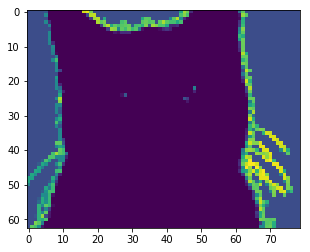

In [29]:
imprime_gatinho_fofo(model, cat)

## O código abaixo recria o modelo anterior, mas com 3 mapas de características ao invés de 1, visando extrair mais características da imagem.

In [30]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

## Pode-se ver pela imagem visualizada abaixo que, com este novo modelo, a quantidade de características extraídas foi bem maior, sendo possível, novamente, observar detalhes da face do gato, como orelhas, olhos e nariz, com menos ênfase na forma.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 63, 79, 3)
Dimensão removendo a quantidade de amostras (63, 79, 3)


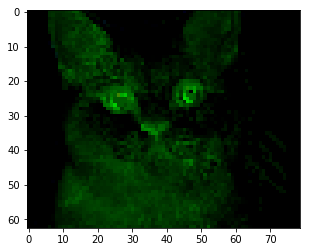

In [31]:
visualize_cat(model, cat)

## O código abaixo cria um novo modelo, com um novo grau de complexidade, introduzindo novas camadas de convolução, ativação com ReLU e maxpooling, que desta vez é menor, com cortes 3x3 e passo 3. Com esta redução do maxpooling possibilita-se uma maior extração de características ainda. As novas camadas adicionadas irão promover uma redução ainda maior da dimensão das características extraídas, com mais ênfase ainda naquelas que forem aprendidas pelo modelo.

In [32]:
model = Sequential()
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

## Pela visualização da imagem abaixo, pode-se perceber que, com este modelo, foi feita uma redução das dimensões de 400x320 para 43x34, só que o modelo foi capaz de dar uma ênfase maior às características que realmente definem um gato de forma geral, desprezando sua forma e mantendo um mapeamento da percepção das orelhas, olhos e nariz, assim como outros detalhes menores.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 34, 43, 1)
Dimensão removendo a quantidade de amostras (34, 43, 1)
Dimensão removendo a quantidade de canais (34, 43)


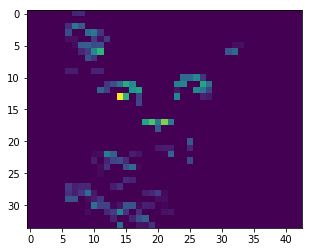

In [33]:
imprime_gatinho_fofo(model, cat)

## O modelo que o código abaixo cria faz um primeiro grupo de camadas com 3 mapas de características, de pooling 3x3 e passo 3, seguido por um segundo grupo de camadas com um único mapa de características e pooling 2x2 e passo 2.

In [34]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

## Pela visualização abaixo pode-se perceber que essa redução da quantidade de mapas de características da primeira camada para a segunda prejudica a extração das características, não sendo possível identificar nenhuma característica na imagem estimada pelo modelo.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 52, 65, 1)
Dimensão removendo a quantidade de amostras (52, 65, 1)
Dimensão removendo a quantidade de canais (52, 65)


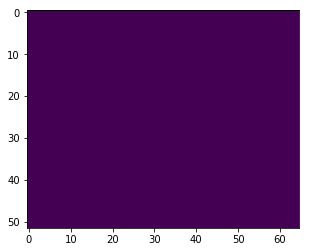

In [35]:
imprime_gatinho_fofo(model, cat)

## O código abaixo volta a criar um modelo que preserva a quantidade do mapa de características entre uma camada e outra.

In [36]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

## Visualizando-se o gato neste novo modelo, percebe-se que o modelo volta a apresentar uma maior capacidade de extração de características. As características percebidas aqui são mais detalhadas em relação ao modelo de 1 único mapa, por fazer uso de 3 mapas, voltando a prever a imagem com 3 canais de cores.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 52, 65, 3)
Dimensão removendo a quantidade de amostras (52, 65, 3)


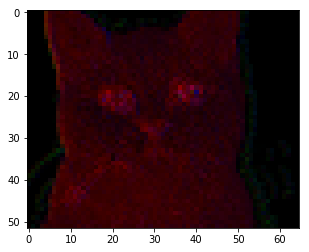

In [37]:
visualize_cat(model, cat)